# Анализ убытков приложения ProcrastinatePRO+

В нашем распоряжении данные о пользователях, привлеченных в развлекательное приложение Procrastinate Pro+ в период с 1 мая 2019г. по 27 октября 2019г.
Нам известно, что, несмотря на огромные вложения в рекламу, компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

**Цели исследования:**

1. Выделить причины неэффективности привлечения пользователей.
2. Сформулировать рекомендации для отдела маркетинга.


**Ход исследования**

Данные о визитах, заказах и рекламных расходах возьмем из файлов `/datasets/visits_info_short.csv`,`/datasets/orders_info_short.csv` и `/datasets/costs_info_short.csv`.О качестве данных ничего неизвестно. Поэтому, перед тем как перейти к исследованию, необходимо будет провести обзор данных.

Структура `visits_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:

- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

Проведем обзор данных и поищем возможность исправить ошибки, которые могут привести к искажению конечных результатов.

Таким образом, наше исследование пройдет девять этапов:

- Загрузка и обзор данных;
- Предобработка данных;
- Добавление функций для расчетов;
- Составление профилей пользователей;
- Изучение перечня стран, устройств и рекламных каналов;
- Маркетинговое исследование;
- Оценка окупаемости рекламы с разбивкой по устройствам, странам и рекламным каналам;
- Основные выводы и выделение причин неэффективности привлечения пользователей;
- Рекомендации для отдела маркетинга.

## Загрузка данных и подготовка к анализу

Загрузим данные, изучим и выполним предобработку.


In [1]:
#импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [2]:
#чтение файла и сохранение в data

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
                       
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
                       
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
#первые 5 строк и info()

display(visits.head(5), orders.head(5), costs.head(5))

print()
print()
print(visits.info())
print()
print()
print(orders.info())
print()
print()
print(costs.info())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns)

Приведем столбцы к нижнему регистру, переименуем там, где это небходимо, поменяем тип данных.

In [4]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()


orders = orders.rename(
    columns={
        'user id' : 'user_id',
        'event dt' : 'event_dt',              
    }
)

visits = visits.rename(
    columns={
        'user id' : 'user_id',
        'session start' : 'session_start',
        'session end' : 'session_end',               
    }
)

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


Проверим тип данных

In [5]:
visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

In [6]:
orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

In [7]:
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

Хотя после просмотра файлов методом `info()` мы видели, что количество строк во всех столбцах датафреймов одинаково, все равно пройдемся методом `isna()`

In [8]:
display(visits.isna().sum(), orders.isna().sum(), costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

Поищем явные дубликаты методом `duplicated()`

In [9]:
display(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0

0

0

Предобработка завершена.

**Вывод:**
* Был изменен регистр и тип данных; 
* Явных дубликатов мы не выявили; 
* Пропусков нет;

## Функции для расчёта и анализа.


Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


В проектной работе будем использовать функции, с которыми мы познакомились в теоретических уроках.

функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

а также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### get_profiles()

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )


    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### get_retention()

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_conversion()

In [12]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_ltv()

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### filter_data()

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### plot_retention()

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### plot_conversion()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### plot_ltv_roi

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Профили пользователей.

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [18]:
#используем ранее заданную функцию get_profiles

profiles = get_profiles(visits, orders, costs) 
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

In [19]:
# доступный интервал привлечения пользователей

min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() # момент анализа


# горизонт анализа

analysis_horizon = 14 

# максимально возможная дата привлечения с учётом горизонта

max_analysis_date = observation_date - timedelta(days=analysis_horizon - 1) 

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-14


In [20]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через две недели после привлечения. Соответственно, устанавливаем горизонт анализа равный 14 дням. Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Максимальной датой для исследования будет 14 октября 2019 года, т.к. в данном случае все пользователи успеют "прожить" назначенный горизонт анализа.

### Регионы пользователей.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны, а также отразим это на графиках.

In [21]:
def visualization(data, parameter, title, ylabel):
    
    """
    
    функция для визуализации количества пользователей и доли платящих пользователей
    
    """
    data = (
    profiles
    .pivot_table(
    index = parameter,
    columns = 'payer',
    values = 'user_id',
    aggfunc = 'count')
    .rename(columns={True : 'payer', False : 'not_payer'})
)
    
    data.plot(kind='barh',figsize=(15,5), stacked=True, grid=True, color={"not_payer": "red", "payer": "green"})
    plt.title(title)
    plt.xlabel('количество пользователей')
    plt.ylabel(ylabel)
    plt.show()

    data.plot.pie(subplots=True, figsize=(13, 7), autopct='%1.1f%%')
    plt.show()
    
    data['share_of_paying'] = (data['payer'] / (data['payer'] + data['not_payer']) * 100).round(2)
    data = data.sort_values(by='share_of_paying', ascending=False)
    display(data)

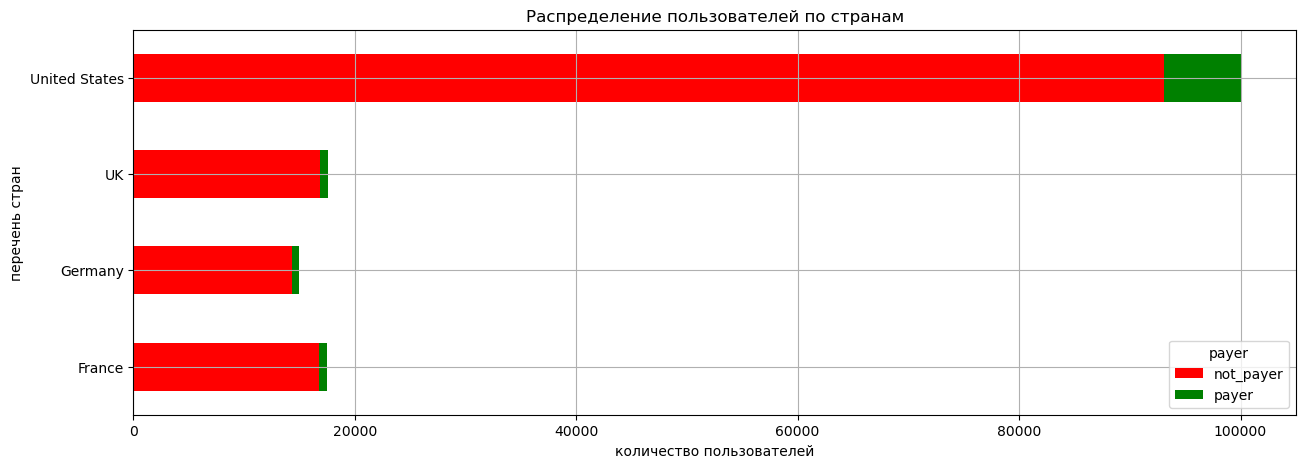

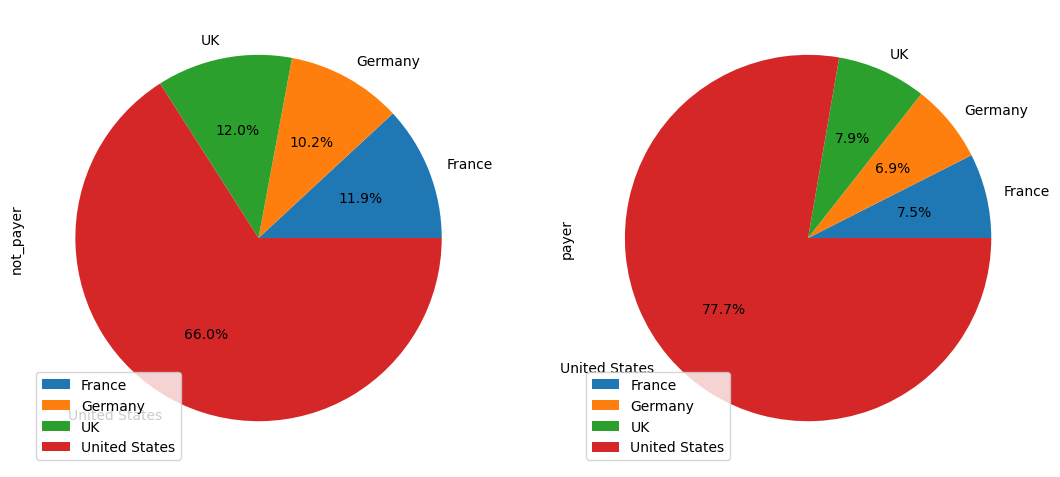

payer          not_payer  payer  share_of_paying
region                                          
United States      93100   6902             6.90
Germany            14365    616             4.11
UK                 16875    700             3.98
France             16787    663             3.80

In [22]:
visualization('country', 'region', "Распределение пользователей по странам", "перечень стран")

Подавляющее большинство пользователей приложения проживают в США (66% от общего числа пользователей).
Пользователи США также отличаются платежеспособностью в лучшую сторону(77% от общего числа платящих пользователей).

На втором и третьем месте по количеству пользователей - Франция и Великобритания, показатели практически одинаковые.

Хоть пользователей из Германии и меньше, чем пользователей из Франции и Великобритании, они отличаются лучшей платежеспособностью.

### Устройства.

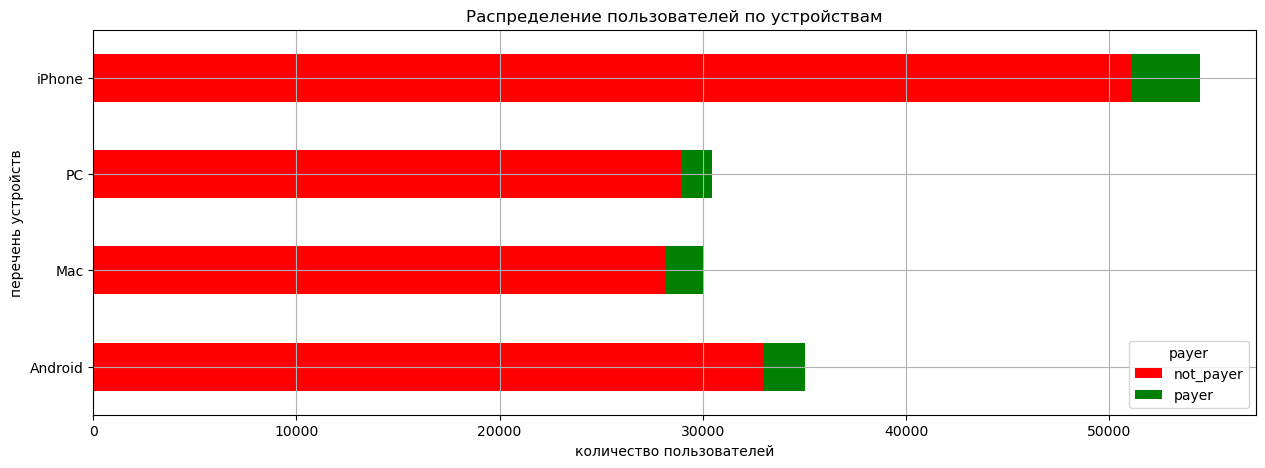

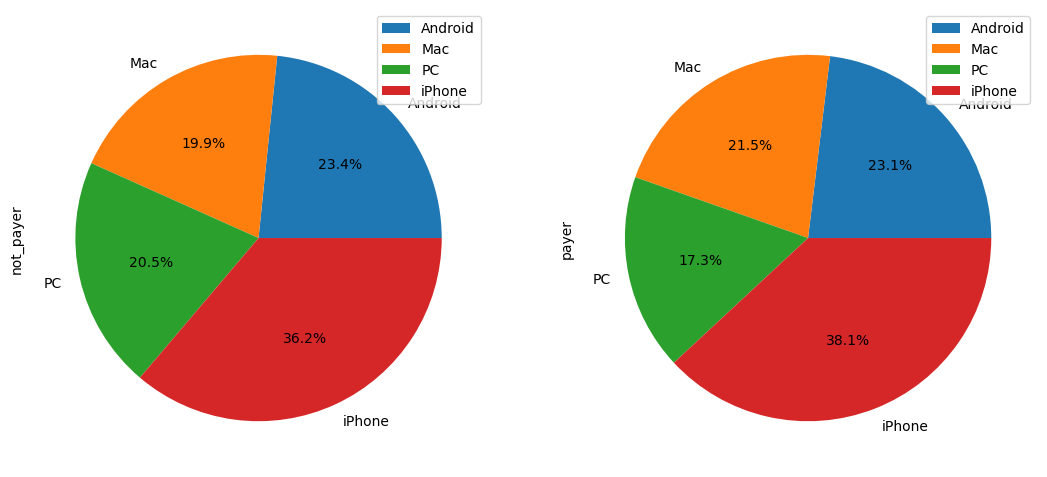

payer    not_payer  payer  share_of_paying
device                                    
Mac          28130   1912             6.36
iPhone       51097   3382             6.21
Android      32982   2050             5.85
PC           28918   1537             5.05

In [23]:
visualization('device', 'device', "Распределение пользователей по устройствам", "перечень устройств")

По устройствам процентное соотношение по платящим и не платящим клиентам примерно одинаковое - большинство пользователей пользуются приложением с айфонов. Доля платящих пользователей при этом ненамного лучше у маков. Это и не удивительно с учетом того, что большая часть пользователей из США, американцы предпочитают apple.

### Каналы привлечения.

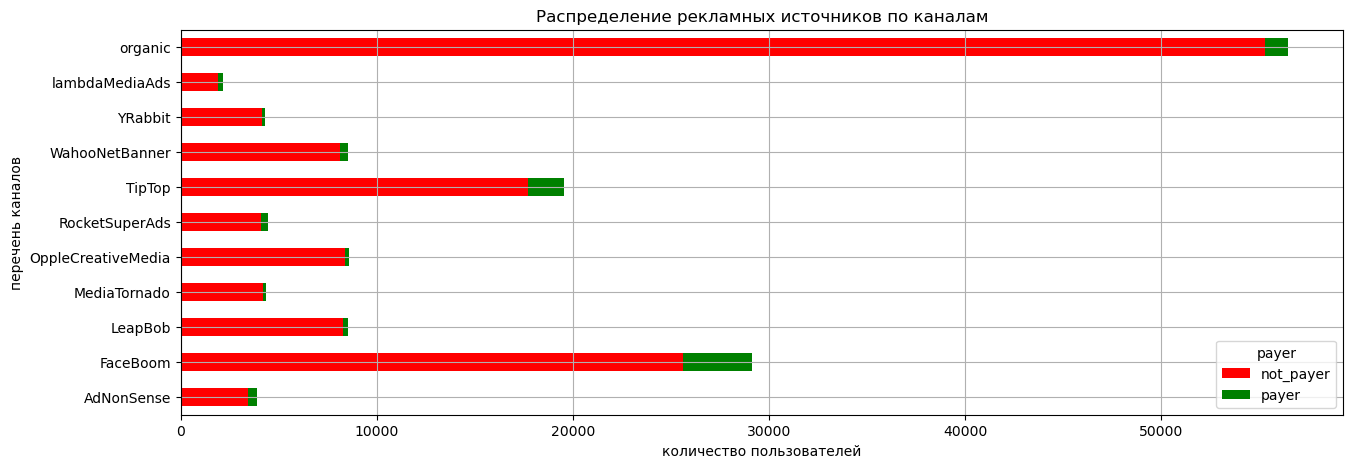

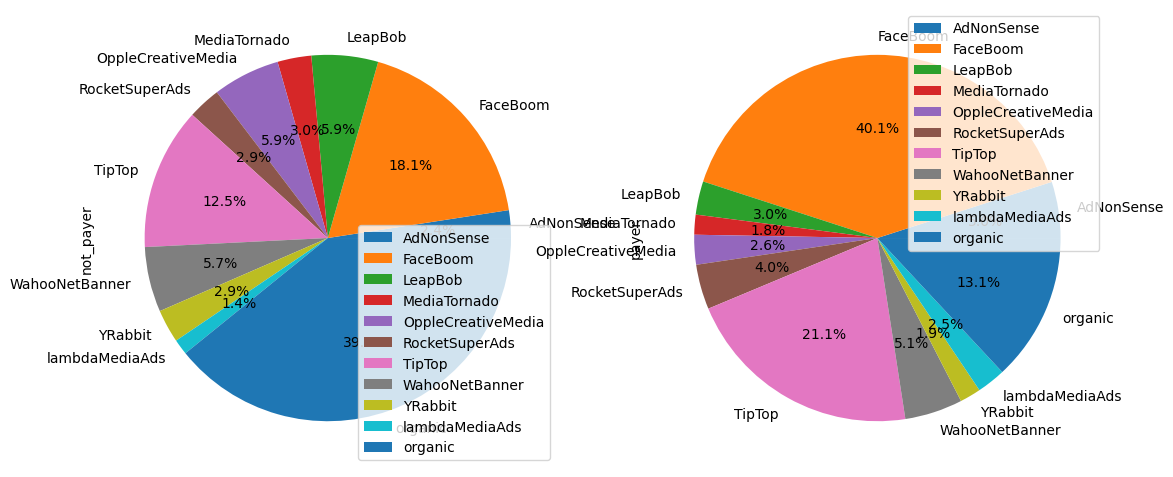

payer               not_payer  payer  share_of_paying
channel                                              
FaceBoom                25587   3557            12.20
AdNonSense               3440    440            11.34
lambdaMediaAds           1924    225            10.47
TipTop                  17683   1878             9.60
RocketSuperAds           4096    352             7.91
WahooNetBanner           8100    453             5.30
YRabbit                  4147    165             3.83
MediaTornado             4208    156             3.57
LeapBob                  8291    262             3.06
OppleCreativeMedia       8372    233             2.71
organic                 55279   1160             2.06

In [24]:
visualization('channel', 'channel', "Распределение рекламных источников по каналам", "перечень каналов")

Большинство пользователей в разбивке по каналам - органические, т.е.пришедшие в приложение самостоятельно. Несмотря на то, что по количеству платящих клиентов данная категория занимает третье место - доля платящих органических пользователей является самой низкой.

Лучшая доля платящих клиентов пришла при помощи канала FaceBoom. Хорошее соотношение также у каналов AdNonSense и lambdaMediaAds, несмотря на небольшое количество привлеченных клиентов.

**Промежуточные выводы:**

- 2/3 пользователей нашего приложения проживают в США. Остальная часть пользователей распределена по трем странам: Германия, Франция и Великобритания практически поровну
- По соотношению платящих пользователей США также лидер, доля платящих пользователей из этого региона - 6.9, т.е., в среднем на 100 пользователей приходится ~ 7 платящих. Вторым по данному показателю идет Германия с показателем 4.1
- Большая часть пользователей пользуется приложением при помощи устройств apple(Mac, iPhone). Это не удивительно, учитывая, что подавляющая часть пользователей из Штатов. Доля платящих среди пользователей apple лучше, чем у PC и Android.
- 1/3 пользователей являются органическими, т.е. пришедшие в приложение самостоятельное, без участия рекламных компаний. Однако доля платящих пользователей в этой категории является самой низкой.
- Доля платящих клиентов среди привлеченных рекламными компаниями сильно отличается. Например, худшие пользователи по этому показателя пришли через OppleCreativeMedia (доля платящих - 2.7), лучшие - через FaceBoom (12.2). Разница в 4,5 раза.

## Маркетинг

### Общая сумма расходов.

In [25]:
costs['costs'].sum().round(2)

105497.3

Общая сумма расходов - 105497.3 ед.

In [26]:
prof = profiles.query('channel != "organic"')
costs_per_user = (costs['costs'].sum().round(2))/(prof['channel'].count())
print('Средняя сумма привлечения одного пользователя: ', costs_per_user.round(2))

Средняя сумма привлечения одного пользователя:  1.13


Исходя из того, что количетсво неорганических пользователей - 93569. Средняя сумма привлечения одного пользователя обходится компании в 1.13 каких-то валютных единиц.

### Распределение рекламного бюджета по источникам.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
costs_channel = costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(by='costs', ascending=False)
costs_channel['share_costs'] = ((costs_channel['costs'] / costs_channel['costs'].sum() ) * 100).round(2)
costs_channel.reset_index().style.background_gradient('BuGn')

Траты были распределены на 10 источников. При этом траты на два из них - TipTop и FaceBoom - состовляют более 82%. Ранее мы выяснили, что FaceBoom привел 29 144 пользователя, TipTop - 19 561 пользователя. Если учесть недавние расчеты о средней стоимости привлечения одного пользователя - 1.13, то получается что 29 144 пользователей FaceBoom должны были нам обойтись в 32 932,7 ед. а TipTop - в 22 103,9 ед. 
С каналом FaceBoom фактические затраты очень близки, а вот с TipTop	есть ощущение, что мы переплатили за привлечение. Будем смотреть дальше.

### Динамика изменения расходов на привлечение.

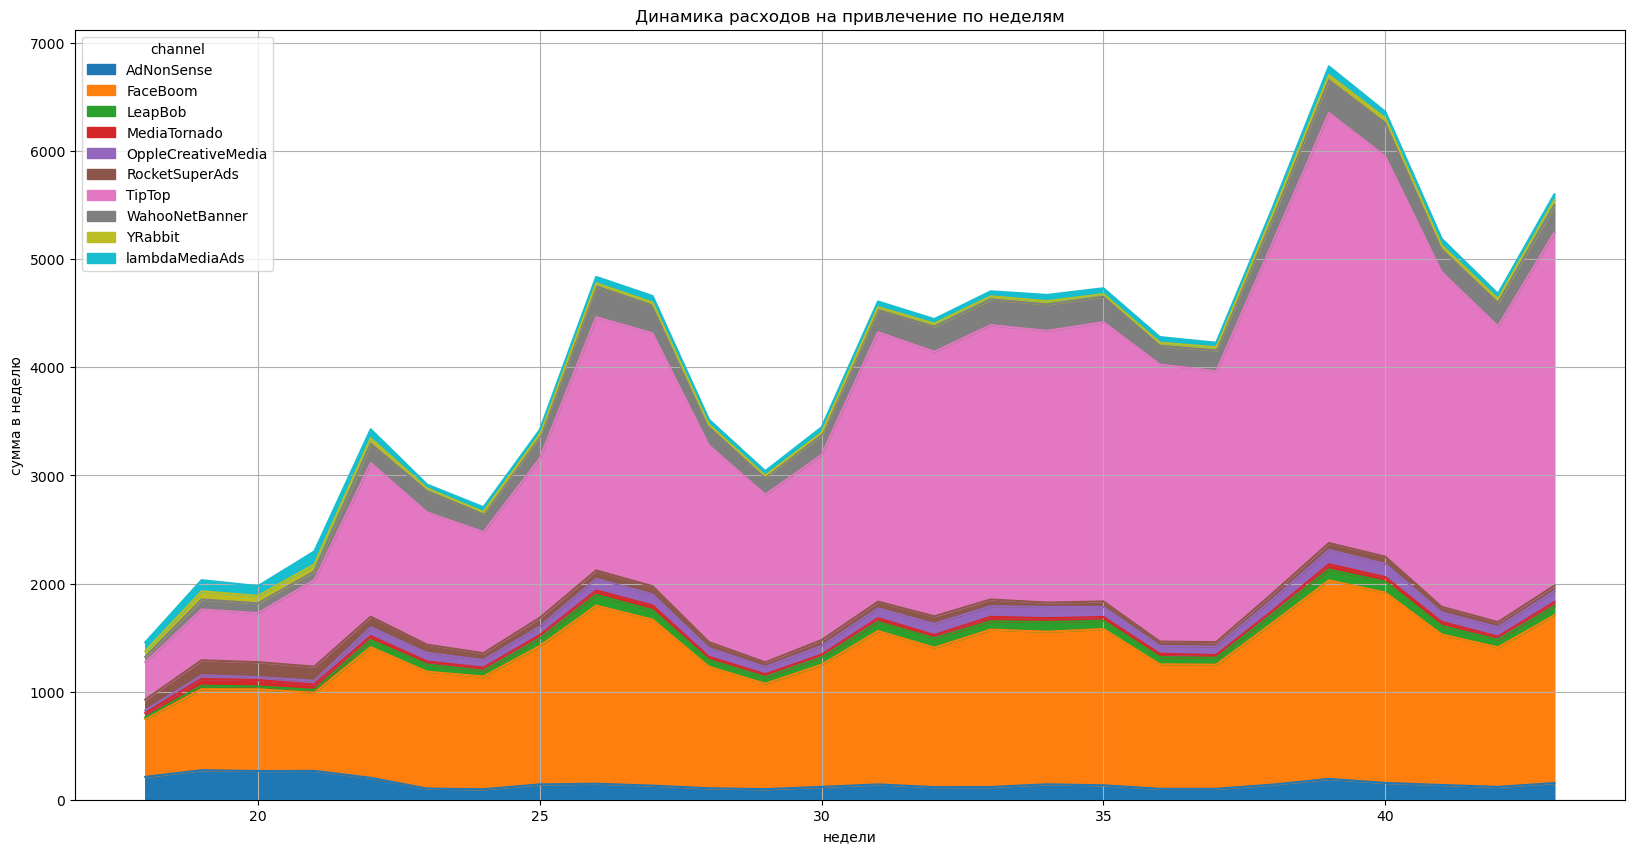

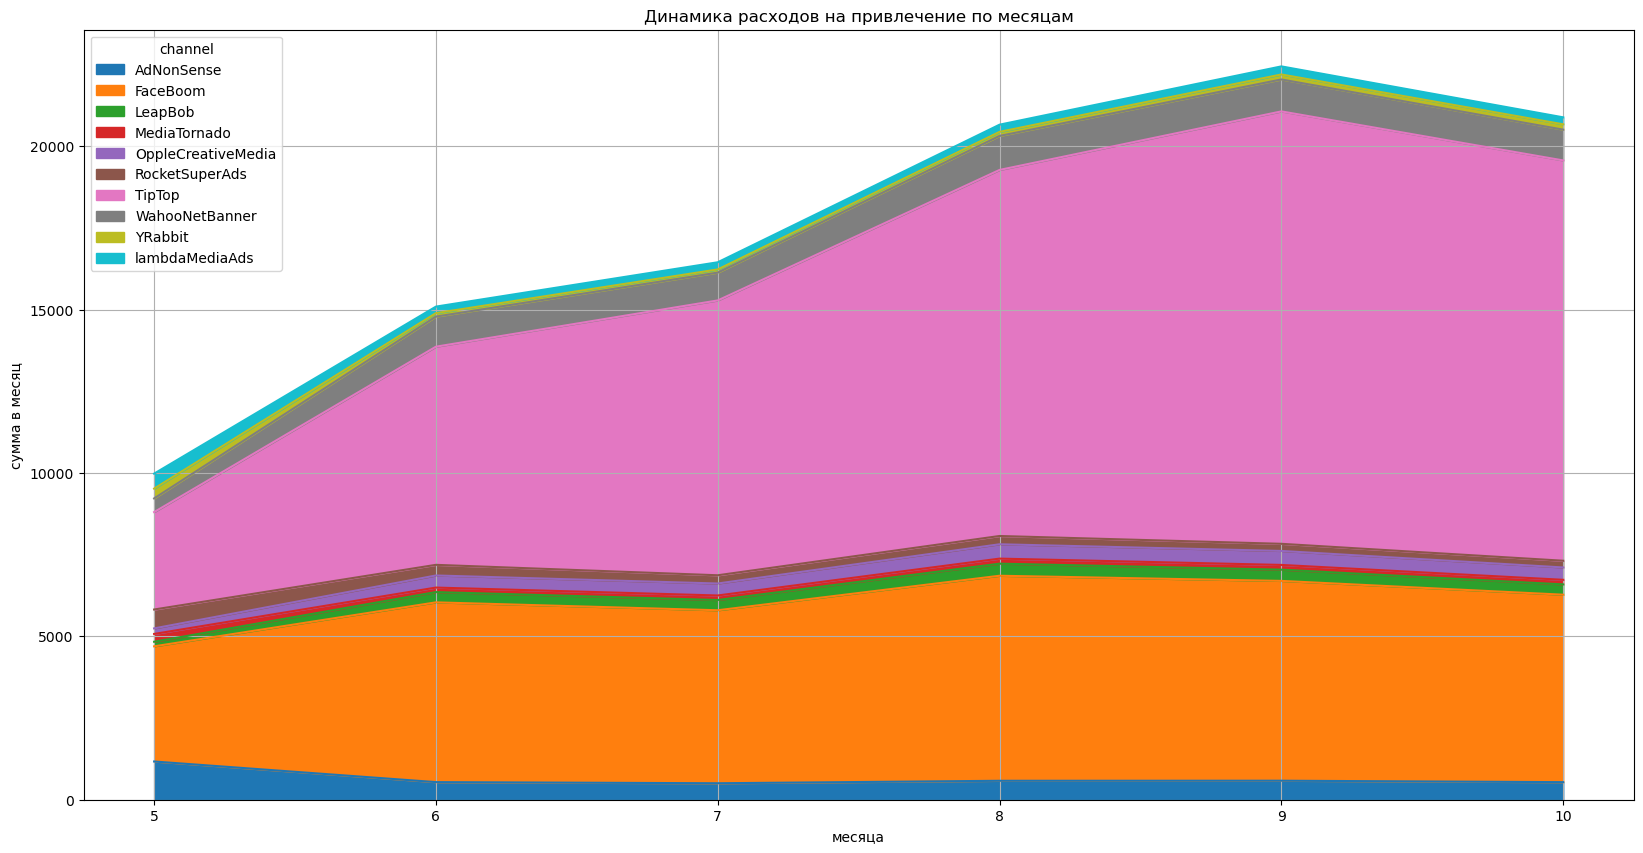

In [28]:
costs_dynamic = costs
costs_dynamic['dt'] = pd.to_datetime(costs_dynamic['dt'])
costs_dynamic['week'] = costs_dynamic['dt'].dt.isocalendar().week
costs_dynamic['month'] = costs_dynamic['dt'].dt.month
(
    costs_dynamic
    .pivot_table(index='week', columns='channel', values = 'costs', aggfunc = 'sum')
    .plot(kind='area', figsize=(20,10), grid=True)
)
plt.title('Динамика расходов на привлечение по неделям')
plt.xlabel('недели')
plt.ylabel('сумма в неделю')
plt.show()


(
    costs_dynamic
    .pivot_table(index='month', columns='channel', values = 'costs', aggfunc = 'sum')
    .plot(figsize=(20,10), grid=True, kind='area')
)
plt.title('Динамика расходов на привлечение по месяцам')
plt.xlabel('месяца')
plt.ylabel('сумма в месяц')
plt.show()


По графикам мы видим, что с самого начала отчетного периода упор делался именно на две неоднократно упомянутые компании - TipTop	и FaceBoom. Причем, если стоимость услуг платформы FaceBoom, начиная с 6-ого месяца, обходится нам в районе 6000 в месяц, то на услуги компании TipTop мы тратили все больше и больше средств.

### CAC

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [50]:
cac = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .reset_index()
)
cac.style.background_gradient('BuGn')

Как мы и предположили ранее, привлечение одного клиента при помощи канала TipTop обходится дороже всего.

**Промежуточные выводы:**

- Общая сумма расходов на маркетинг составила 105497.3 ед.
- Исходя из того, что количество неорганических пользователей - 93569. Средняя сумма привлечения одного пользователя обходится компании в 1.13 ед.
- Траты на маркетинг были распределены между 10 рекламными компаниями.
- Распределение трат по компаниям неравномерное. На две компании (FaceBoom и TipTop) тратиться 82% бюджета, на остальные 8 - лишь 18%.
- По 9-ти из 10-ти компаниям траты в целом происходят равномерно на дистанции в 6 месяцев. Сильно выбивается компания TipTop. Траты на данную компанию постоянно растут.

## Оценика окупаемость рекламы

### Анализ окупаемость рекламы без разбивки на каналы.

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI без разбивки на каналы.

In [51]:
# исключим органических пользователей, поскольку сейчас мы будем анализировать окупаемость рекламы.

profiles = profiles.query('channel != "organic"') 

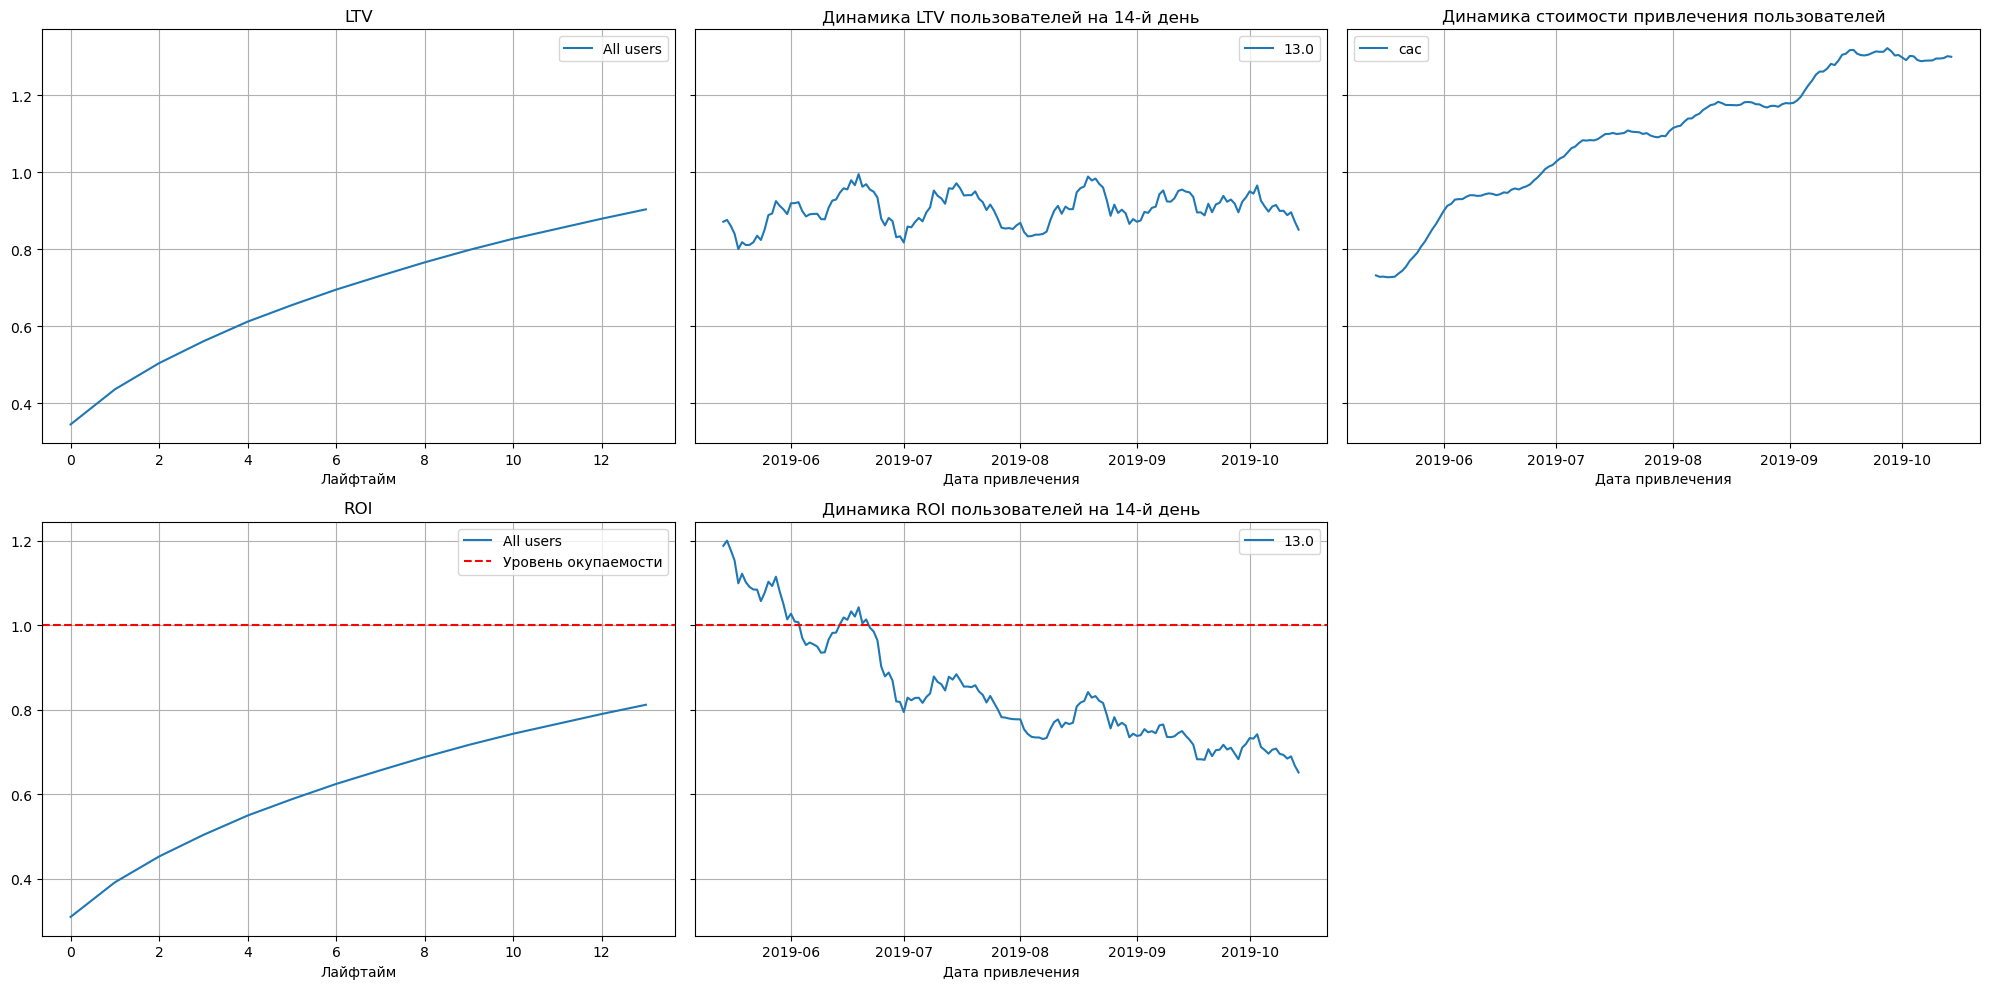

In [52]:
# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)
# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14) 

Мы видим, что CAC с течением времени стабильно растет. Значит, затраты на рекламу увеличиваются, либо уменьшилось количество привлекаемых пользователей.
При этом, начиная с середины июня, реклама перестала окупаться в 14-ти дневном лайфтайме, а ROI так и продолжил снижаться вплоть до октября.

### Анализ окупаемости рекламы с разбивкой по устройствам.

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, графики динамики LTV, CAC и ROI, графики конверсии и удержания.

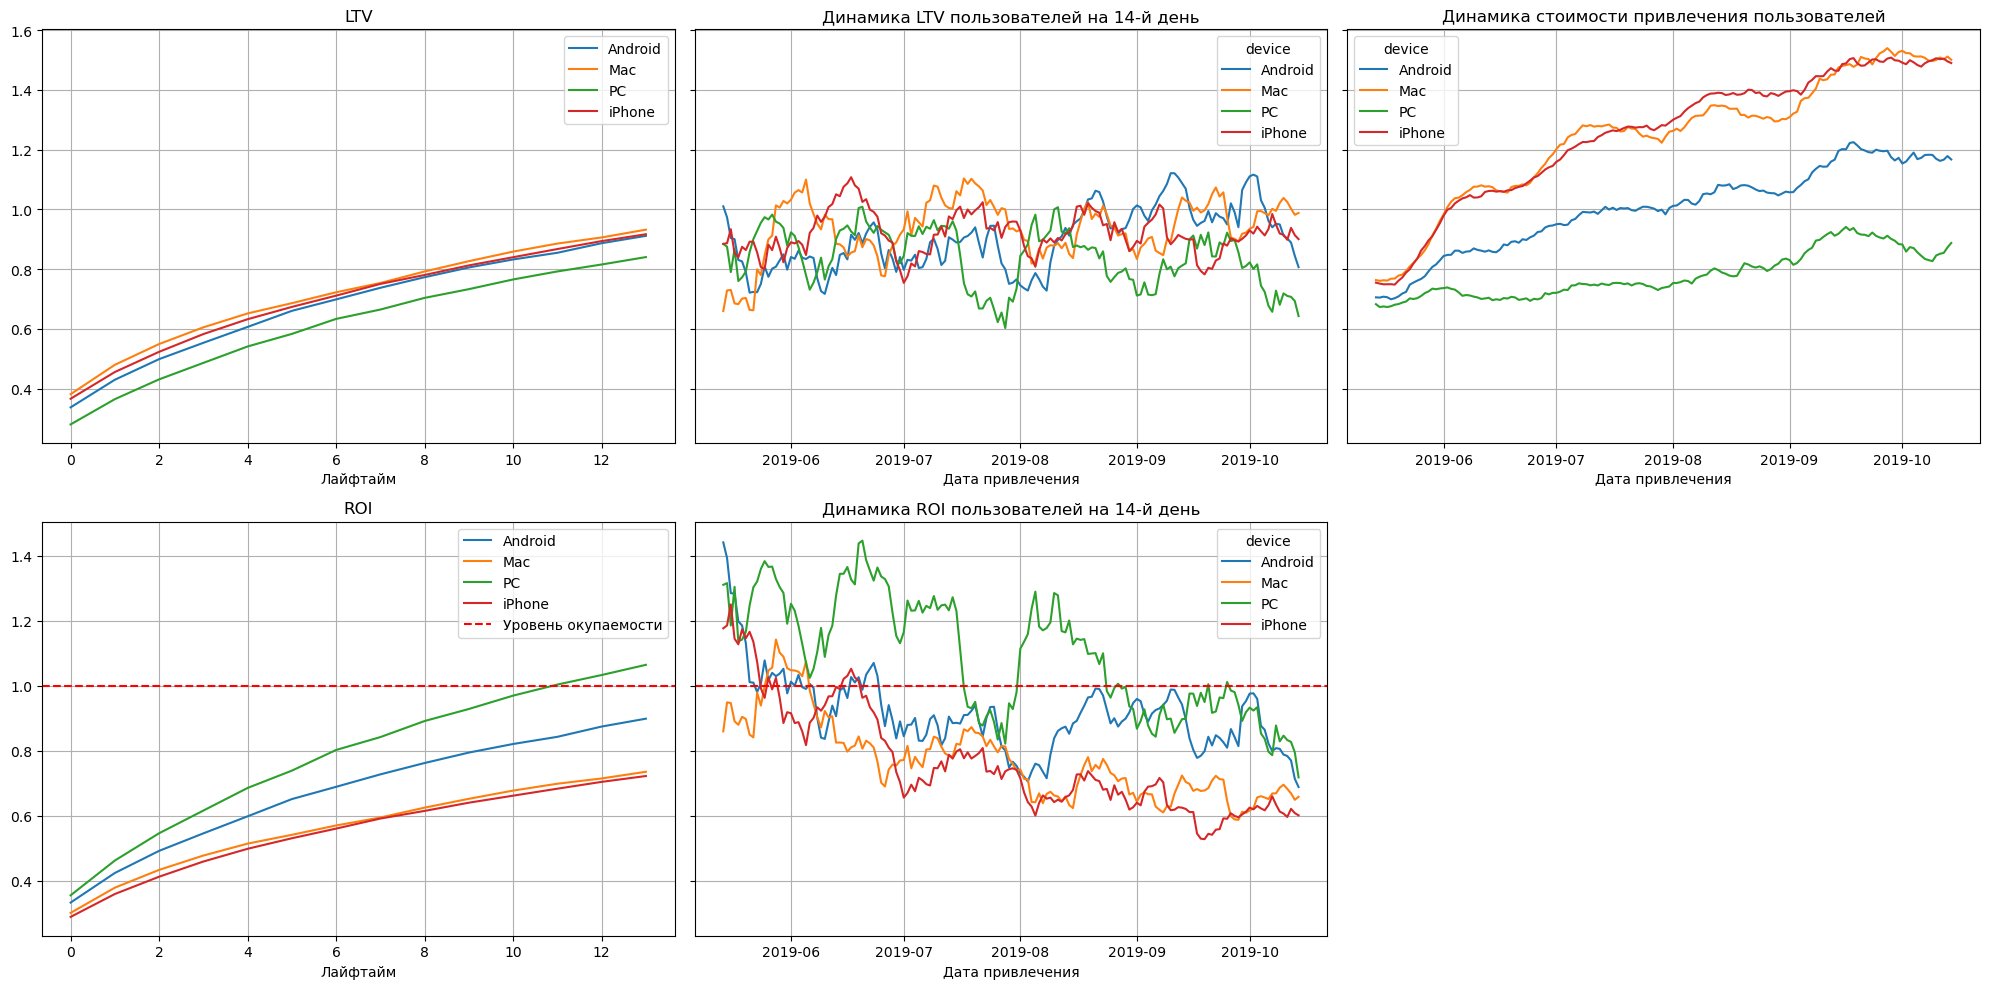

In [34]:
dimensions = ['device']

# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14) 

Стоимость привлечения пользователей Apple обходится дороже. Привлечение пользователей PC стоит меньше всего.
При этом мы видим, что пользователи PC окупаются по рекламе лучше, а пользователи Apple - хуже всех. Напрямую влияет стоимость привлечения.

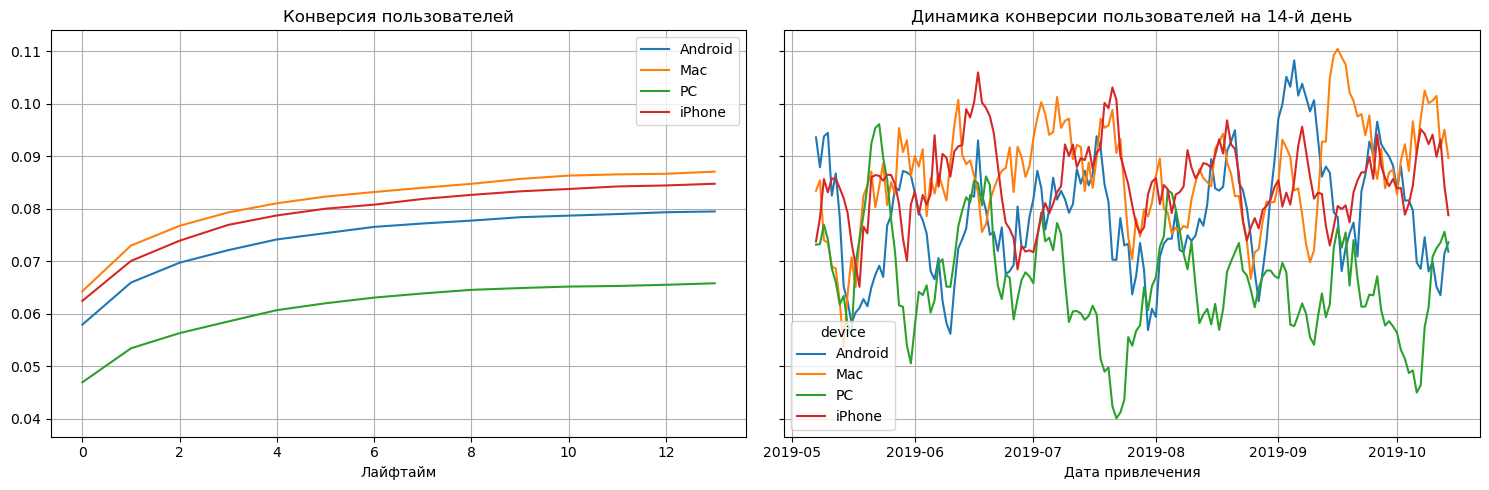

In [35]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

Несмотря на то, что пользователи PC окупают вложенные в рекламу средства лучше всего, конверсирсия у них худшая. Пользователи остальных устройств находяться примерно на одном уровне.

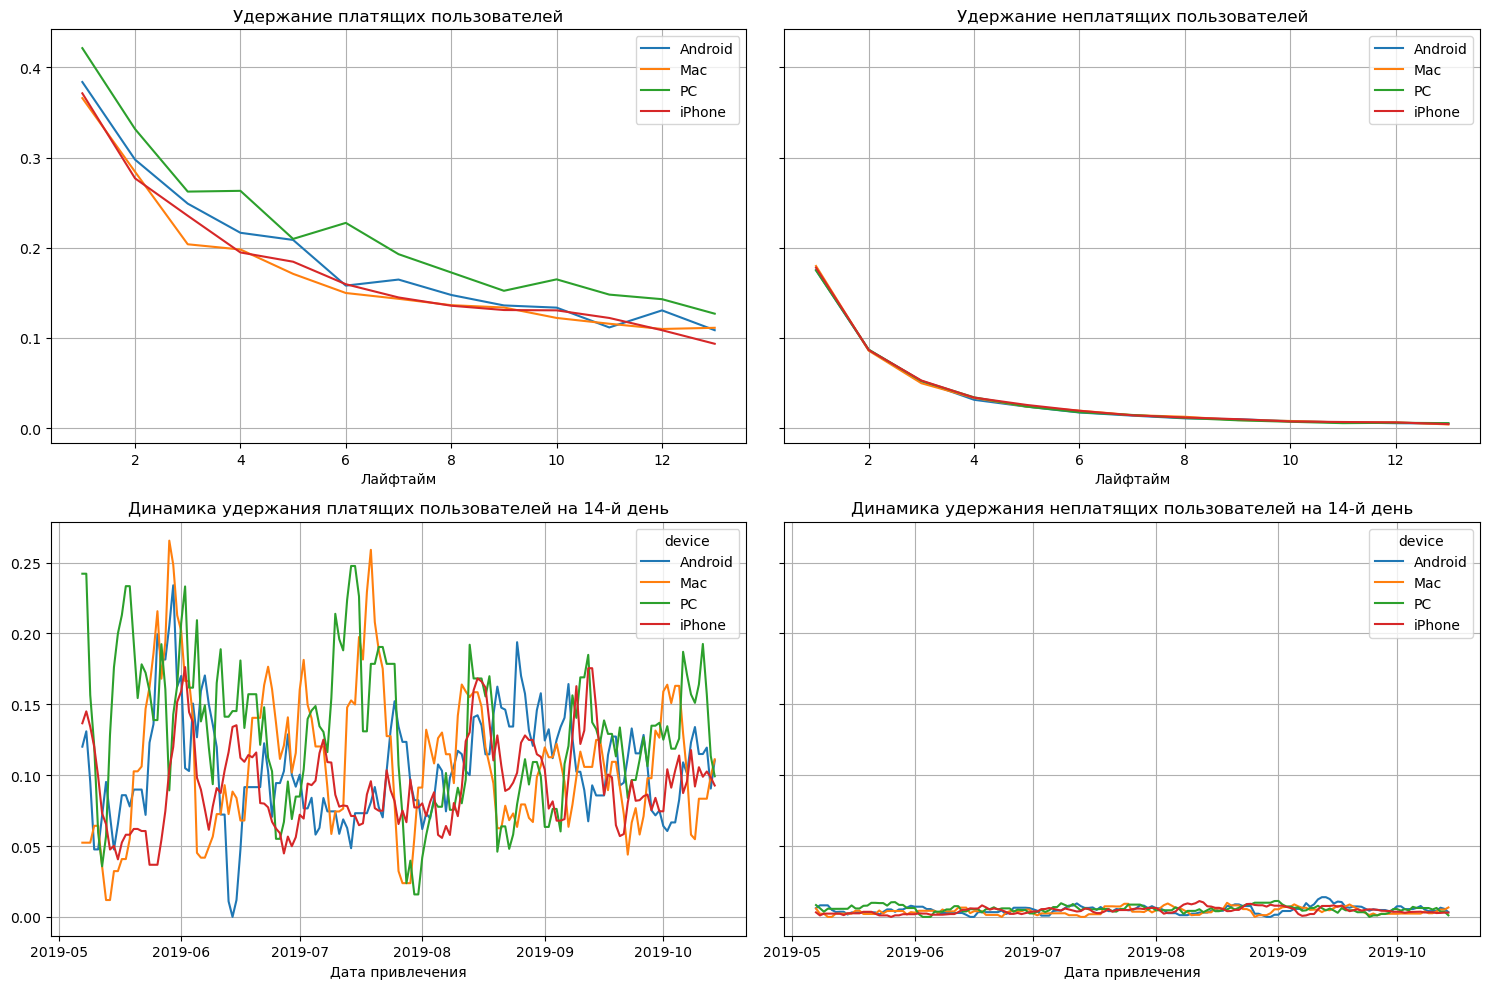

In [36]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 


Удержание пользователей не сильно зависит от устройств. Лучше всего среди платящих клиентов удерживаются пользователи PC.
Интересно было бы еще посмотреть, специализируются ли определенные рекламные каналы на привлечении пользователей определенных устройств.

In [53]:
(
    profiles.pivot_table(index='channel',columns='device',values='user_id',aggfunc='count')
    .sort_values(by='iPhone', ascending=False) 
    .style.background_gradient('BuGn')
)


Можно предположить, что, выбирая определенный рекламный канал, мы ориентировались на то, с пользователями каких устройств данный рекламный канал больше работает. Каналы FaceBoom и TipTop явно ориентированы на владельцев техники Apple.
Есть также каналы, ориентированные на PC.
Что странно, ни один рекламный канал не ориентирован на Android.

### Анализ окупаемость рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, графики динамики LTV, CAC и ROI, а также конверсии и удержания.

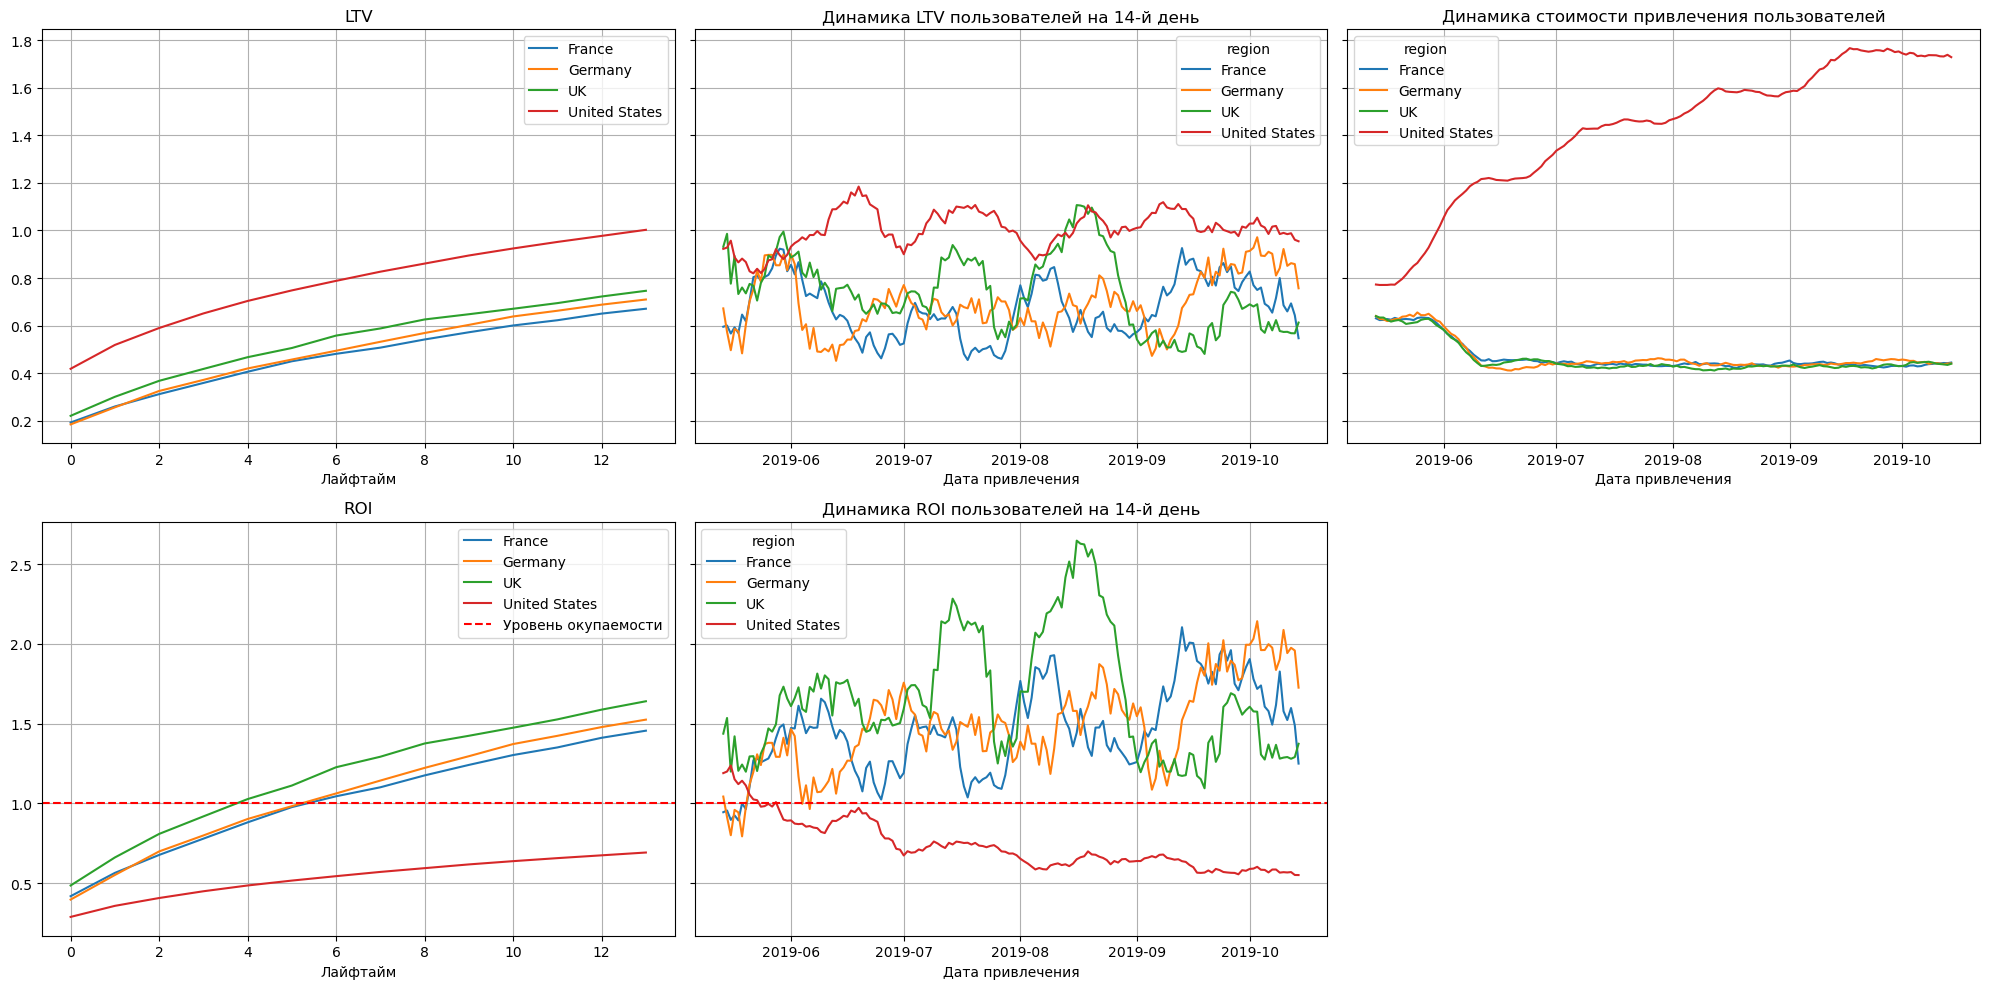

In [38]:
dimensions=['region']

# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)


# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14) 

Стоимость привлечения пользователей из США постоянно растет. При этом затраты на рекламу не окупаются уже с середины мая.
С Европой все намного лучше. Стоимость привлечения остается на одном уровне начиная с июня. К тому же затраты на рекламу в этом регионе окупаются.

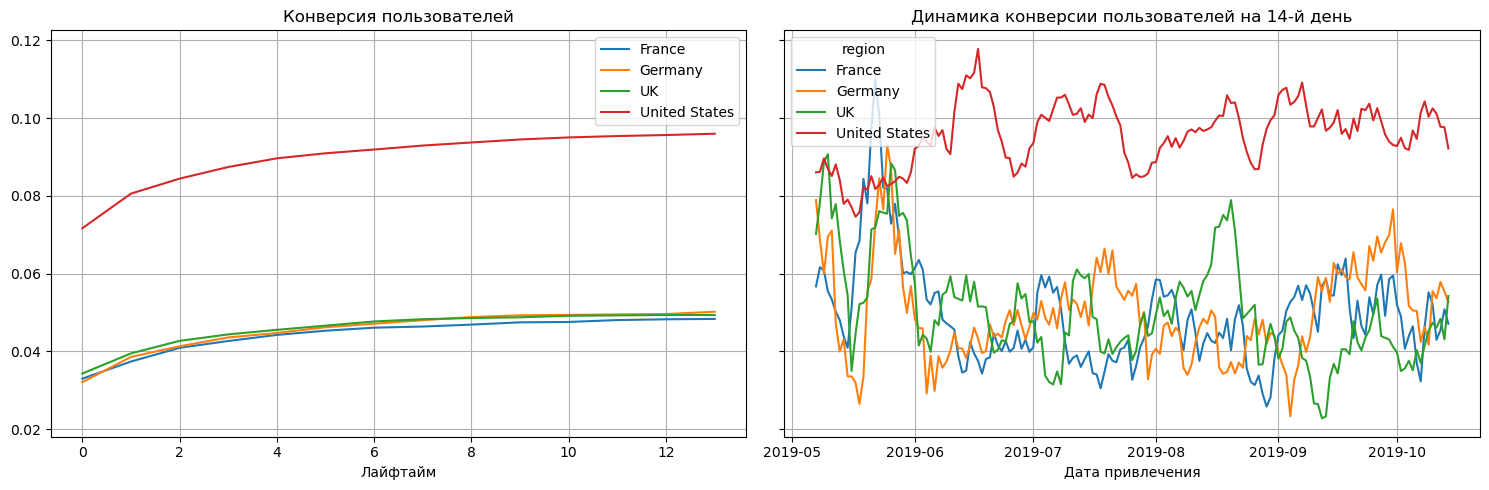

In [39]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

Конверсия у пользователей из США почти в два раза выше чем у пользователей из Европы. Посмотрим удержание.

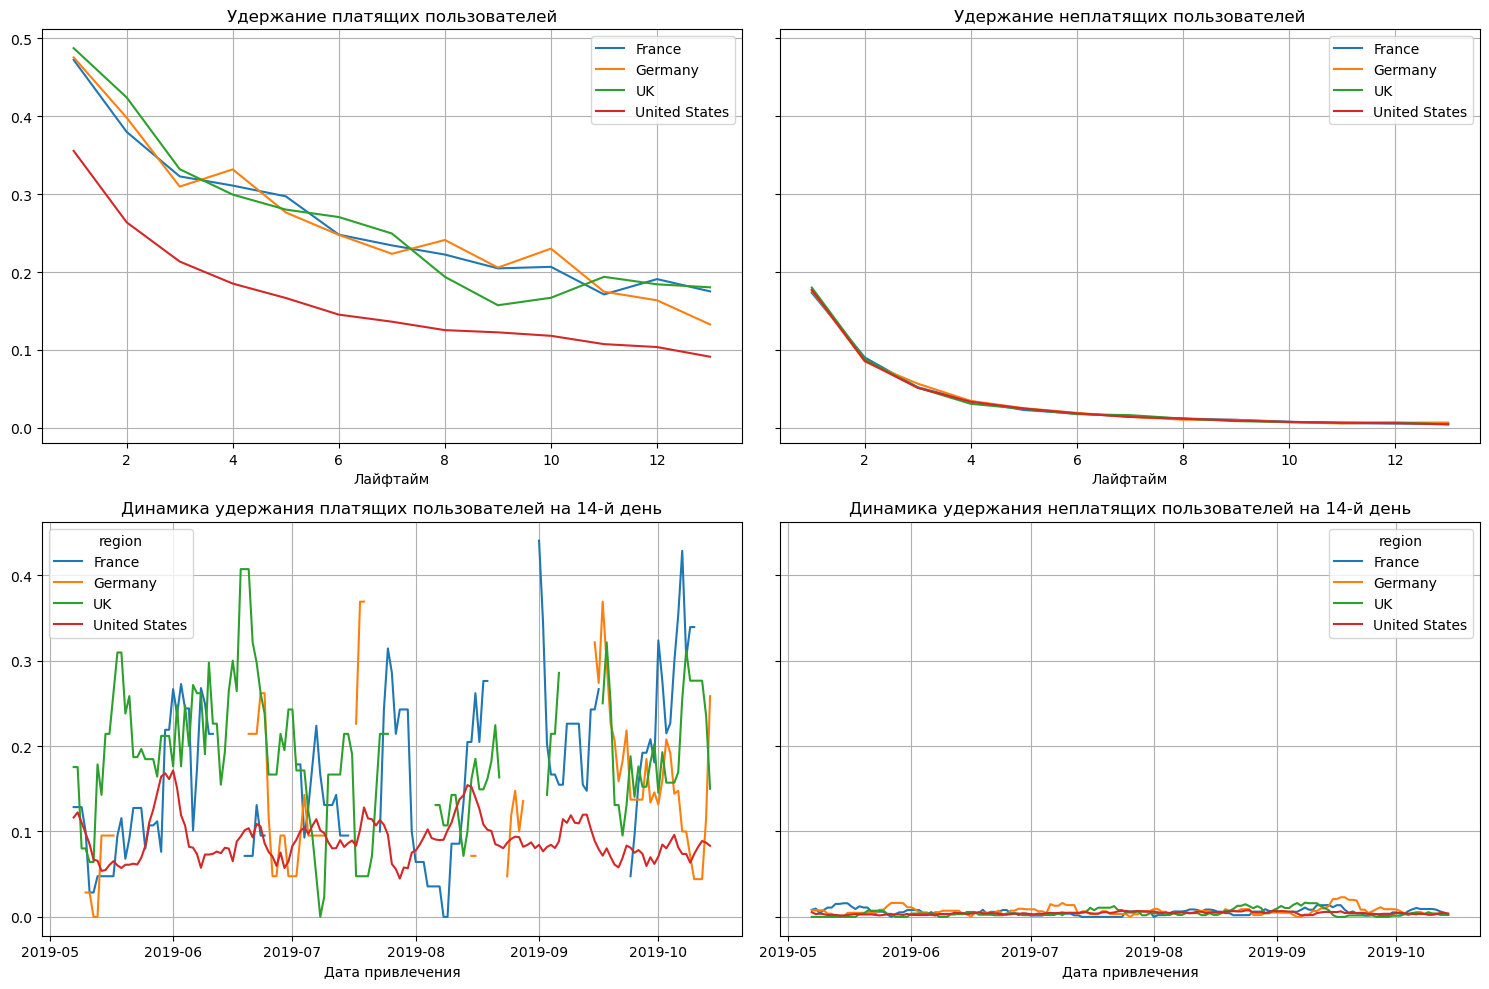

In [40]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 


Несмотря на хорошую конверсию, платящие пользователи из США удерживаются хуже всего. Посмотрим также, на пользователей каких стран ориентируются определенные рекламные каналы.

In [63]:
(
    profiles
    .pivot_table(index='channel',columns='region',values='user_id',aggfunc='count')
    .sort_values(by='United States', ascending=False)
    .fillna(0)

)

region              France  Germany      UK  United States
channel                                                   
FaceBoom               0.0      0.0     0.0        29144.0
TipTop                 0.0      0.0     0.0        19561.0
RocketSuperAds         0.0      0.0     0.0         4448.0
MediaTornado           0.0      0.0     0.0         4364.0
YRabbit                0.0      0.0     0.0         4312.0
AdNonSense          1366.0   1219.0  1295.0            0.0
LeapBob             2988.0   2519.0  3046.0            0.0
OppleCreativeMedia  2991.0   2562.0  3052.0            0.0
WahooNetBanner      2971.0   2579.0  3003.0            0.0
lambdaMediaAds       742.0    649.0   758.0            0.0

FaceBoom и TipTop ориентированны исключительно на жителей США. Этим и объясняется количество пользователей Apple, привлеченных данными компаниями.
При этом каналы, работающие в Европе, распределены по странам практически поровну.

In [42]:
usa = profiles.query('region == "United States"')

print(f'Количество привлеченных рекламными каналами пользователей из США: {usa["user_id"].count()}')

eur = profiles.query('region != "United States"')

print(f'Количество привлеченных рекламными каналами пользователей из Европы: {eur["user_id"].count()}')


Количество привлеченных рекламными каналами пользователей из США: 61829
Количество привлеченных рекламными каналами пользователей из Европы: 31740


In [43]:
costs_channel

costs  share_costs
channel                                  
TipTop              54751.30        51.90
FaceBoom            32445.60        30.75
WahooNetBanner       5151.00         4.88
AdNonSense           3911.25         3.71
OppleCreativeMedia   2151.25         2.04
RocketSuperAds       1833.00         1.74
LeapBob              1797.60         1.70
lambdaMediaAds       1557.60         1.48
MediaTornado          954.48         0.90
YRabbit               944.22         0.90

Таким образом, 86% рекламного бюджета ушло на компании, работающие в США, при этом отношение пользователей США и Европы примерно 2 к 1.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постром графики LTV и ROI, графики динамики LTV, CAC и ROI, а также конверсии и удержания.

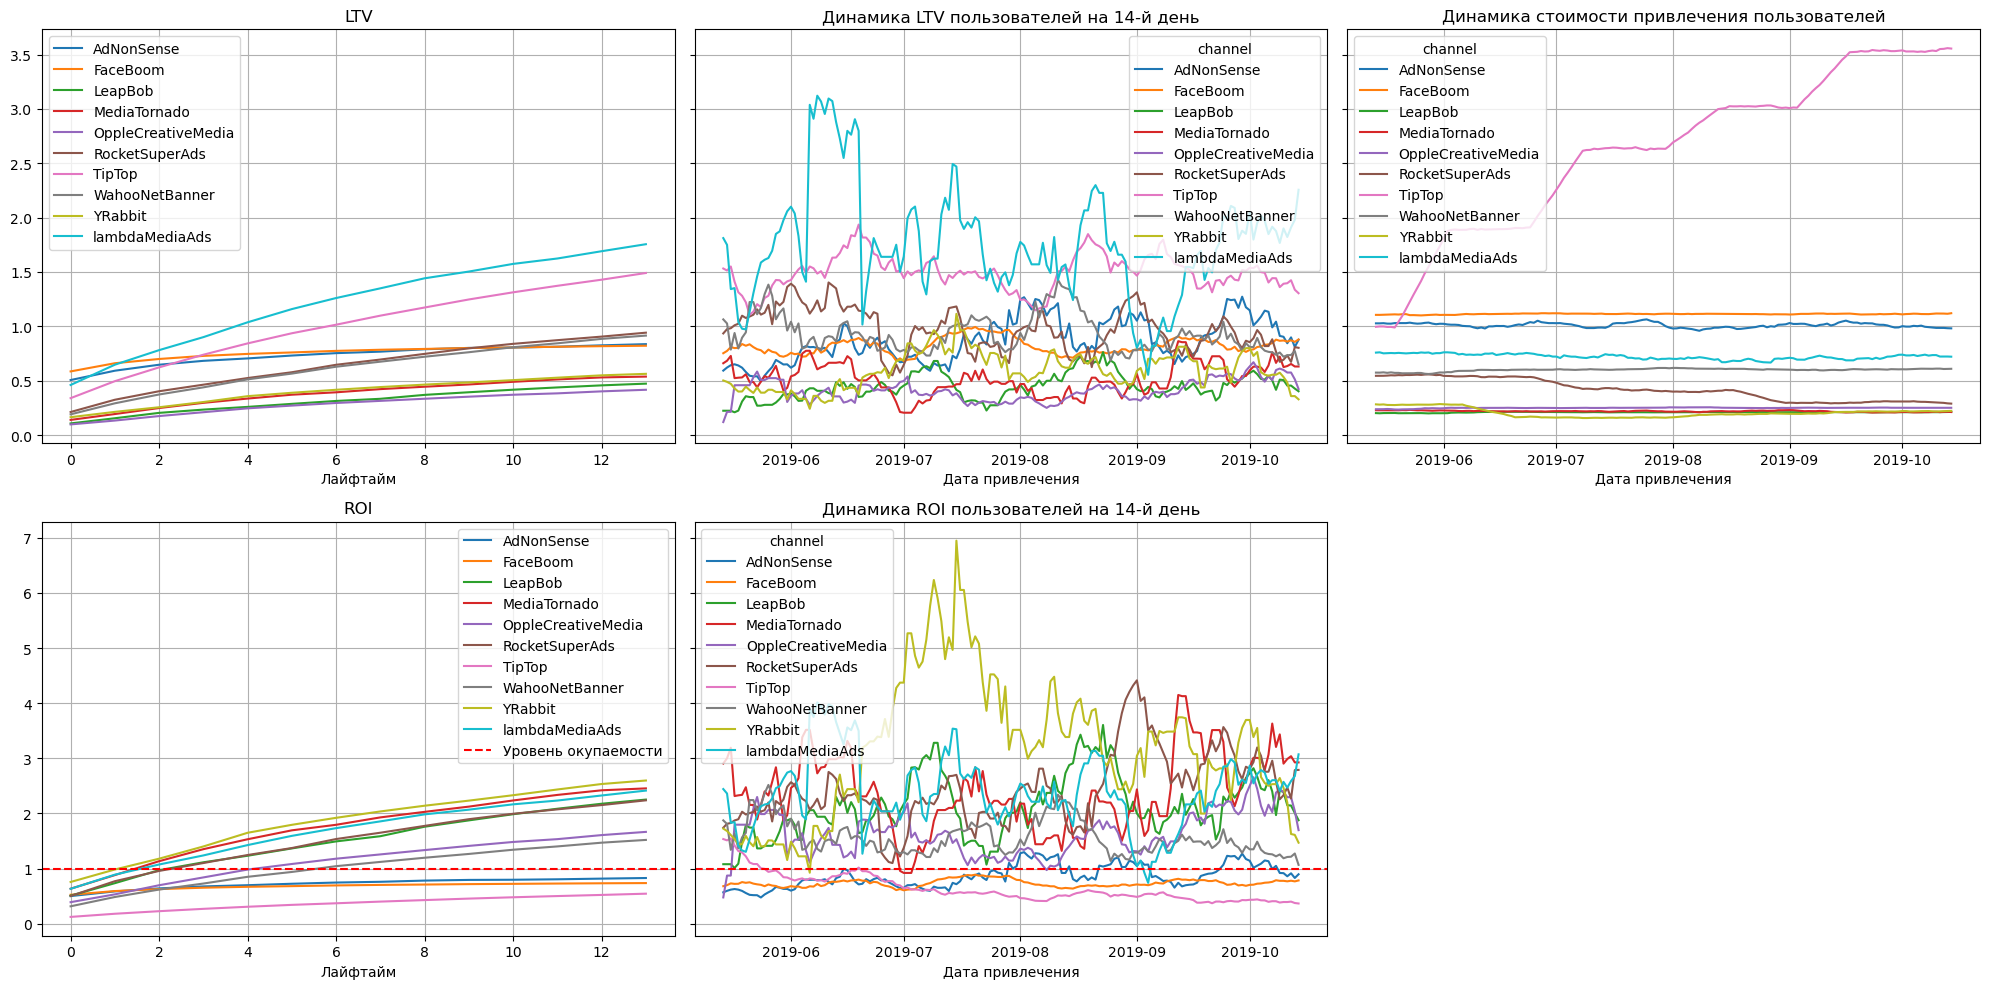

In [44]:
dimensions=['channel']

# считаем LTV и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

# строим графики

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14) 

Стоимость привлечения по всем каналам, кроме TipTop, остается в целом на одном уровне, где-то даже немного падает. Стоимость услуг TipTop постоянно растет. Не удивительно, что затраты на рекламу посредством этого канала не окупаются. В целом ситуация была бы не такая плохая, если бы затраты по компаниям распределялись более равномерно. Реклама по 7 из 10 каналам окупается.

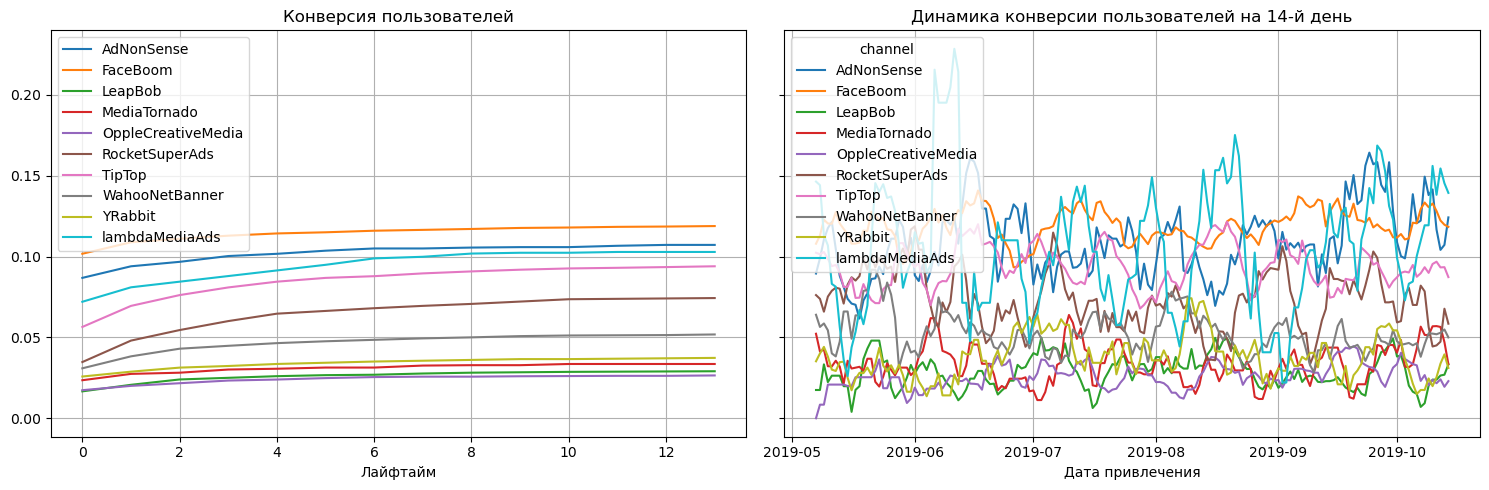

In [45]:
# смотрим конверсию с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon) 

Выше всего конверсия у пользователей, привлеченных каналом FaceBoom. Данные пользователи также имеют неплохую динамику удержания, а вот у lambda какой-то ужасный разброс.

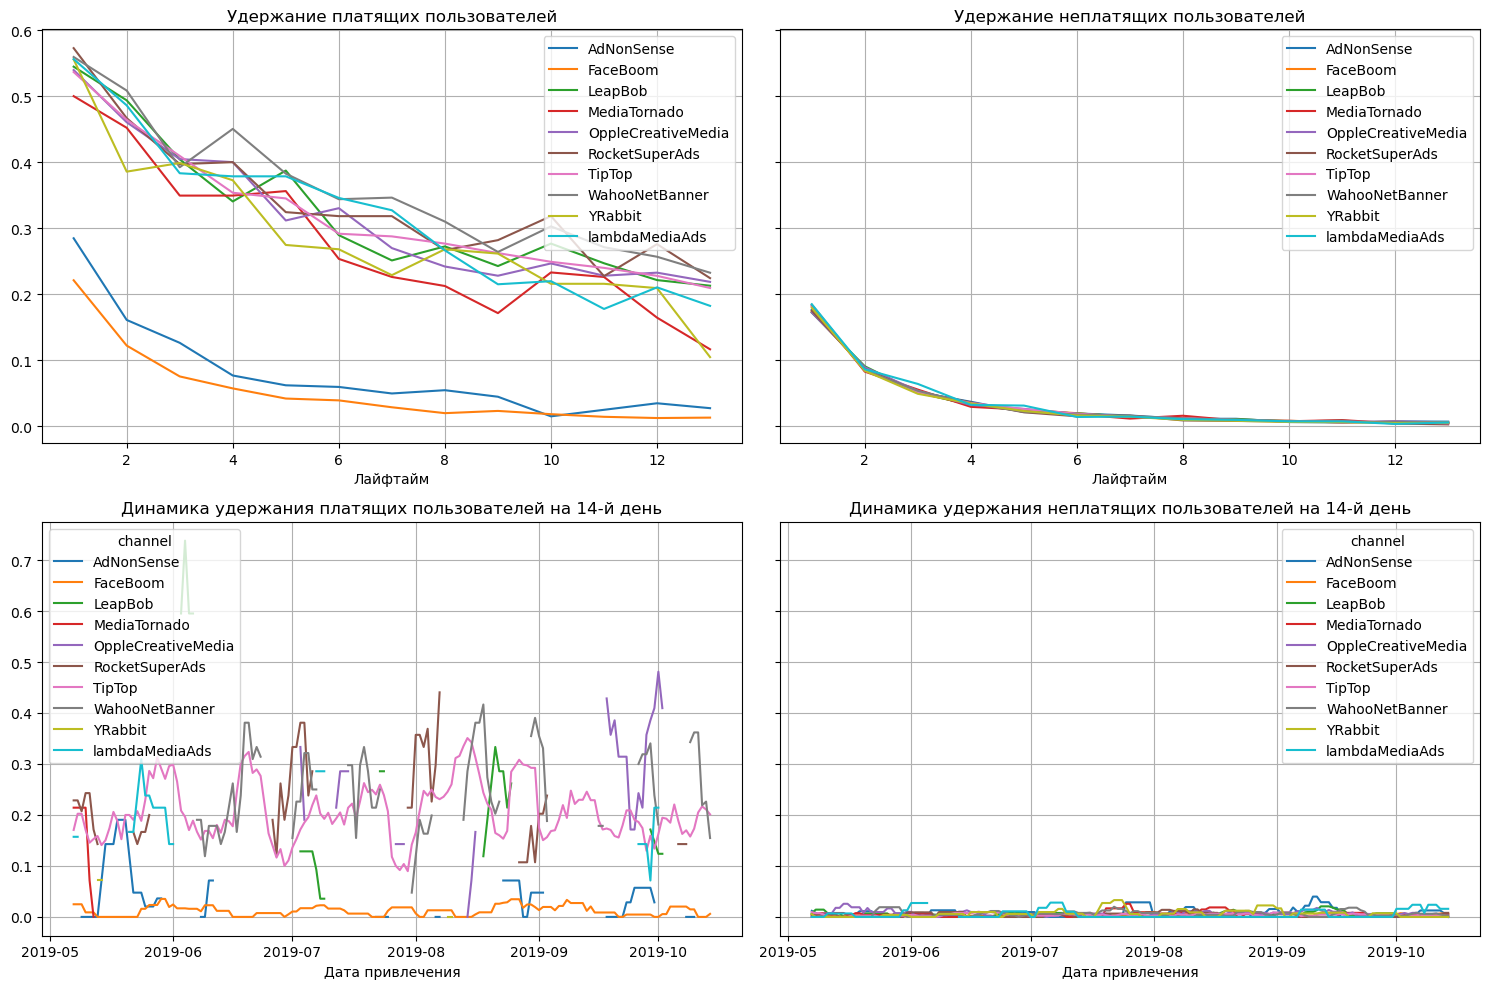

In [46]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon) 


Самое плохое удержание у платных пользователей, пришедших с FaceBoom, а ведь в эту компанию мы вложили более 30% рекламного бюджета.

## Выводы и рекомендации.

### Общие выводы

* Общее количество привлеченных пользователей за период с 1 мая 2019г. по 27 октября 2019г. - 150 008
     * количетсво неорганических пользователей - 93 569
     * количество органических пользователей - 56 439
     
     
* Привлеченные пользователя являются жителями четырех стран - США, Германия, Франция, Великобритания
     * Пользователей из США - 100 002
     * Пользователей из Германии - 14 981
     * Пользователей из Великобритании - 17 575
     * Пользователей из Франции - 17 450
     
     
* Платящих пользователей - 8 881
     * Пользователей из США - 6 902
     * Пользователей из Германии - 616
     * Пользователей из Великобритании - 700
     * Пользователей из Франции - 663
     
     
* Сумма расходов на рекламную компанию - 105497.3 ед.
     * данная сумма была распределена на услуги 10-ти рекламных компаний:
          * TipTop - 54 753
          * FaceBoom - 32 449
          * WahooNetBanner - 5148
          * AdNonSense - 3913
          * OppleCreativeMedia - 2152
          * RocketSuperAds - 1836
          * LeapBob - 1793
          * lambdaMediaAds - 1561
          * MediaTornado - 949
          * YRabbit - 949


* Привлечение одного клиента в среднем обходится компании в 1.13 ед.
     * средняя стоимость привлечения одного клиента с разбивкой по каналам:
          * TipTop - 2.8
          * FaceBoom - 1.1
          * AdNonSense -1.01
          * lambdaMediaAds - 0.7
          * WahooNetBanner - 0.6
          * RocketSuperAds - 0.41
          * OppleCreativeMedia - 0.25
          * YRabbit - 0.22
          * MediaTornado 0.22
          * LeapBob - 0.21


### Причины неэффективности привлечения пользователей.

**Рекламная компания за период с 1 мая 2019г. по 27 октября 2019г. не окупилась**


*Поскольку 82% направленного на рекламу бюджета было распределено между двумя рекламными каналами (FaceBoom и TipTop) - наша рекламная компания оказалась зависима от результатов работы двух данных каналов.*

* Стоимость услуг канала TipTop превысила выгоду с привлечения.
* Удержание клиентов в 14-ти дневный лайфтайм, пришедших с FaceBoom, оказалось худшим среди всех компаний.

*Из-за данных факторов рекламная компания через эти каналы не окупается. А с учетом того, что на две этих компании ушла львиная доля наших вложений, по общим показателям реклама также не окупилась. Таким образом, заложенная в наш бизнес-план цель: окуп рекламы не позднее чем через две недели после привлечения не выполняется.*



### Рекомендации для отдела маркетинга.

1. **Рекламные каналы и регионы привлечения** 
   * Возможно, следует распределять бюджет на рекламные каналы более равномерно, чтобы перестраховаться в случае провала какого-либо из каналов. В частности, обратить внимание на других партнеров из США:
        * **RocketSuperAds**, **MediaTornado**, **YRabbit** - затраты на рекламу у данных компаний окупаются. Пользователи, пришедшие с данных каналов имеют неплохое удержание, RocketSuperAds при этом имеет довольно хорошую конверсию.
   * Постараться выяснить причины плохого удержания у FaceBoom и постоянного роста стоимости привлечения у TipTop.
   * Уделить больше внимания Европейскому региону. Несмотря на то, что 86% рекламного бюджета ушло на жителей США, соотношение пользователей приложения 2 к 1. Это касается как привлеченных (60тыс к 30тыс), так и органических пользователей (40тыс к 20тыс). К тому же Европейский рынок смотрится достаточно хорошо по многим другим показателям рекламных каналов - стоимость привлечения, окупаемость рекламы, удержание.
        * Наиболее перспективным рекламным каналом на Европейском рынке выглядит **lambdaMediaAds**
   * В ходе исследования появилась гипотеза, что рекламные каналы, с которыми мы работаем, ориентированы на определенные устройства. Например, есть каналы, которые привлекают больше пользователей PC, есть каналы привлекающие в большей степени пользователей Apple. Возможно, в виде эксперимента следует подыскать рекламный канал ориентированный больше на пользователей Android и изучить показатели.
        
2. **Работа с органическими пользователями**
    * Приложение привлекает не малое количество органических пользователей - 33%. Доля платящих пользователей этой категории при этом ниже всего. Постараться продумать алгоритмы по увеличению доли платящих пользователей данной категории.


